# **Examen Practico 2 - Modulo 4: Analisis de Clusters Deportes de Fantasia**

--------------------------------
## **Contexto** 
-------------------------------

Los deportes de fantasía son plataformas de juegos en línea donde los participantes seleccionan y gestionan equipos virtuales de deportistas profesionales reales. Según el desempeño de los jugadores en el mundo real, a los jugadores se les asignan puntos en la plataforma de deportes de fantasía en cada partido. El objetivo es crear el mejor equipo posible con un presupuesto fijo para conseguir el máximo de puntos de fantasía, y los usuarios compiten entre sí durante una liga o temporada deportiva completa. Algunos de estos deportes de fantasía requieren inversiones financieras reales para participar, con posibilidades de ganar recompensas monetarias y entradas gratuitas para el día del partido de forma periódica.

El mercado de los deportes de fantasía ha experimentado un enorme crecimiento en los últimos años, con una valoración de \\$18,6 mil millones en 2019. El segmento de fútbol lideró en términos de participación de mercado en 2019, con más de 8 millones de participantes en todo el mundo, y se espera que mantener su dominio durante los próximos años. La digitalización es uno de los principales factores que impulsan el crecimiento del mercado de los deportes de fantasía, ya que permite a los participantes la oportunidad de competir a nivel global y poner a prueba sus habilidades. Con un aumento en el uso de teléfonos inteligentes y la disponibilidad de aplicaciones de deportes de fantasía, se espera que este mercado sea testigo de un aumento mundial y alcance una valoración de \\$ 48,6 mil millones para 2027.


----------------------------
## **Objectivo**
-----------------------------

OnSports es una plataforma de deportes de fantasía que tiene ligas de fantasía para muchos deportes diferentes y ha sido testigo de un número creciente de participantes en todo el mundo durante los últimos 5 años. Para cada jugador, se establece un precio al principio y el precio sigue cambiando con el tiempo según el desempeño de los jugadores en el mundo real. Con la nueva temporada de la Premier League inglesa a punto de comenzar, han recopilado datos de la temporada pasada y quieren analizarlos para determinar el precio de cada jugador de cara al inicio de la nueva temporada. OnSports lo contrató como científico de datos y le pidió que realizara un análisis de conglomerados para identificar jugadores con diferentes potenciales de cada jugador en función del desempeño de la temporada anterior. Esto les ayudará a comprender los patrones en el desempeño de los jugadores y los retornos de fantasía y a decidir el precio exacto que se fijará para cada jugador para la próxima temporada de fútbol.


--------------------------
## **Diccionario de Datos**
--------------------------

- **Player_Name:** Nombre del jugador.
- **Club:** Club en el que juega el jugador.
- **Position:** Posición en la que juega el jugador.
- **Goals_Scored:** Número de goles marcados por el jugador en la temporada anterior.
- **Assists:** Número de pases realizados por el jugador que condujeron a goles en la temporada anterior.
- **Total_Points:** Número total de puntos Fantasy anotados por el jugador en la temporada anterior.
- **Minutes:** Número de minutos disputados por el jugador en la temporada anterior.
- **Goals_Conceded:** Número de goles encajados por el jugador en la temporada anterior.
- **Creativity:** Una puntuación, calculada utilizando una serie de estadísticas, que evalúa el rendimiento del jugador en términos de generar oportunidades de gol para otros jugadores.
- **Influence:** Una puntuación, calculada utilizando una variedad de estadísticas, que evalúa el impacto de un jugador en un partido, teniendo en cuenta acciones que podrían afectar directa o indirectamente el resultado del partido.
- **Threat:** Una puntuación, calculada utilizando una variedad de estadísticas, que mide a los jugadores que tienen más probabilidades de marcar goles.
- **Bonus:** Total de puntos de bonificación recibidos. Los tres jugadores con mejor desempeño en cada partido reciben puntos de bonificación adicionales basados en una puntuación calculada utilizando una variedad de estadísticas. Se otorgan 3 puntos al jugador con mayor puntuación, 2 al segundo mejor y 1 al tercero.
- **Clean_Sheets:** Número de partidos sin encajar gol en la temporada anterior.

## **Importar las librerias**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Complete the code to import the data
data=pd.read_csv('Cuaderno Examen 2 Modulo 4 - data.csv')

In [3]:
# Check the shape of the data
data.shape

(476, 13)

In [4]:
# Let's view a sample of the data
data.sample(n = 10, random_state = 1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


In [5]:
# Checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [6]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [7]:
# Check for duplicate values
data[data.duplicated()]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets


In [8]:
# Check for missing values in the data
# R//: no hay datos vacios

## **Exploratory Data Analysis**

**Let's check the statistical summary of the data**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


**Observations and Insights: _____**
* En Goals_Scored la desviación estándar es mayor que el promedio, lo cual indica que los datos están extremadamente dispersos.
* En Assist la desviación estándar es mayor que el promedio, lo cual indica que los datos están extremadamente dispersos.
* En Total_Points la desviación estándar es menor, pero bastante cercana que el promedio, lo que indica que los valores son poco dispersos.
* En Minutes la desviación estándar es menor, pero bastante cercana que el promedio, lo que indica que los valores son poco dispersos.
* En Goals_Conceded la desviación estándar es menor, pero bastante cercana que el promedio, lo que indica que los valores son poco dispersos.
* En Creativity la desviación estándar es mayor que el promedio, lo cual indica que los datos están extremadamente dispersos.
* En Influence la desviación estándar es menor, pero bastante cercana que el promedio, lo que indica que los valores son poco dispersos.
* En Threat la desviación estándar es mayor que el promedio, lo cual indica que los datos están extremadamente dispersos.
* En Bonus la desviación estándar es mayor que el promedio, lo cual indica que los datos están extremadamente dispersos.
* En Clean_Sheets la desviación estándar es menor, pero bastante cercana que el promedio, lo que indica que los valores son poco dispersos.


### **Univariate Analysis**

In [10]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**`Goals_Scored`**

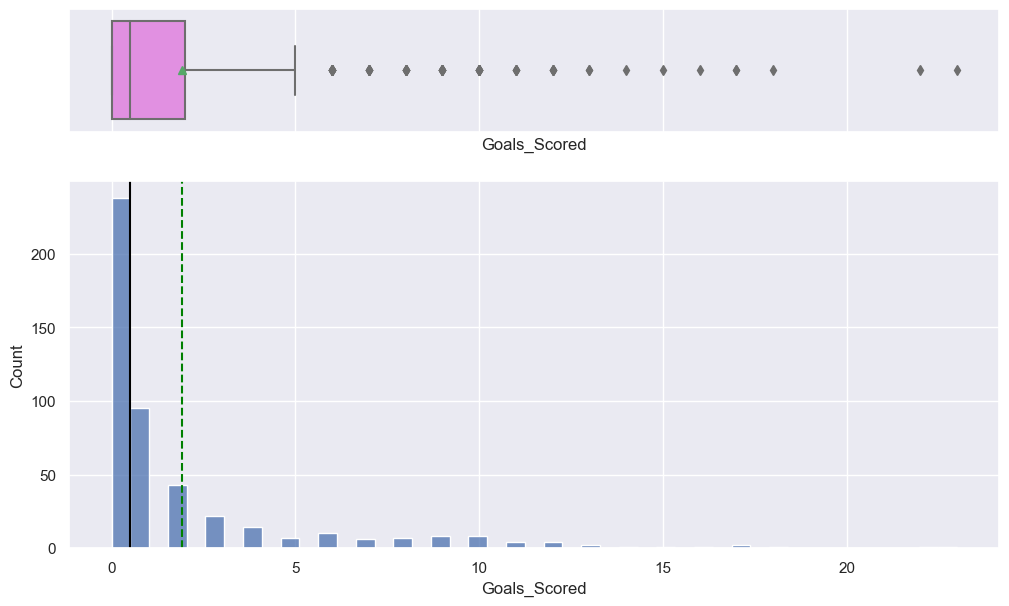

In [11]:
histogram_boxplot(df, 'Goals_Scored')

**`Assists`**

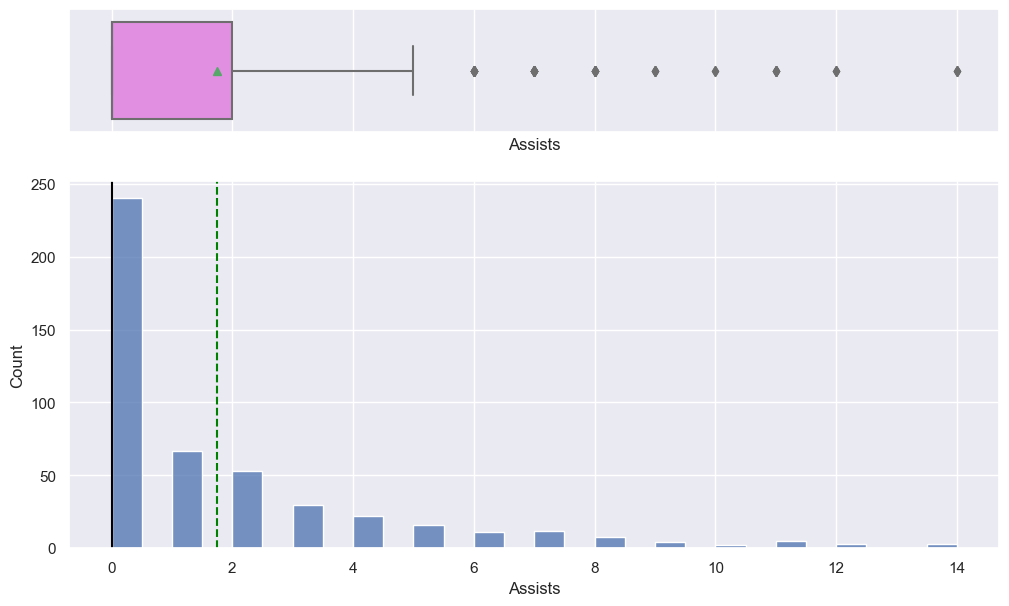

In [12]:
histogram_boxplot(df, 'Assists')  # Complete the code to create histogram_boxplot for 'Assists'

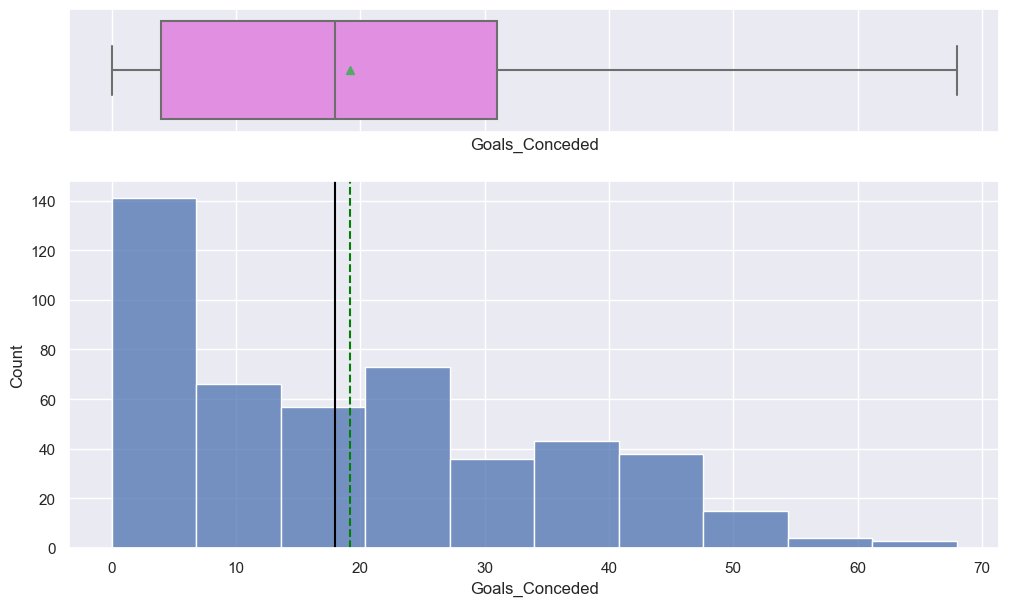

In [13]:
# Plot the histogram and the boxplot for 'Goals_Conceded'
histogram_boxplot(df, 'Goals_Conceded')

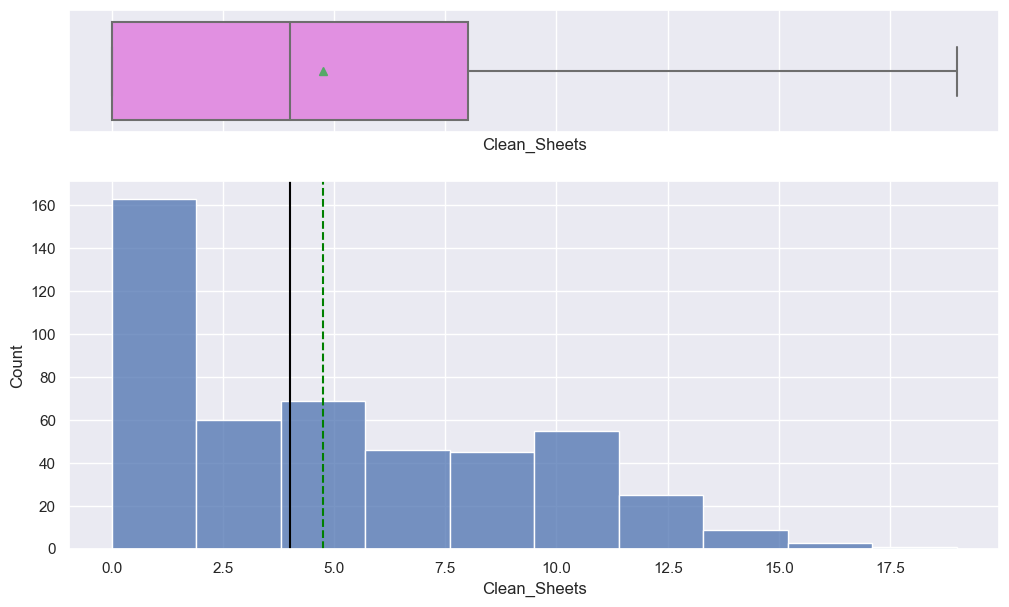

In [14]:
# Plot the histogram and the boxplot for 'Clean_Sheets'
histogram_boxplot(df, 'Clean_Sheets')

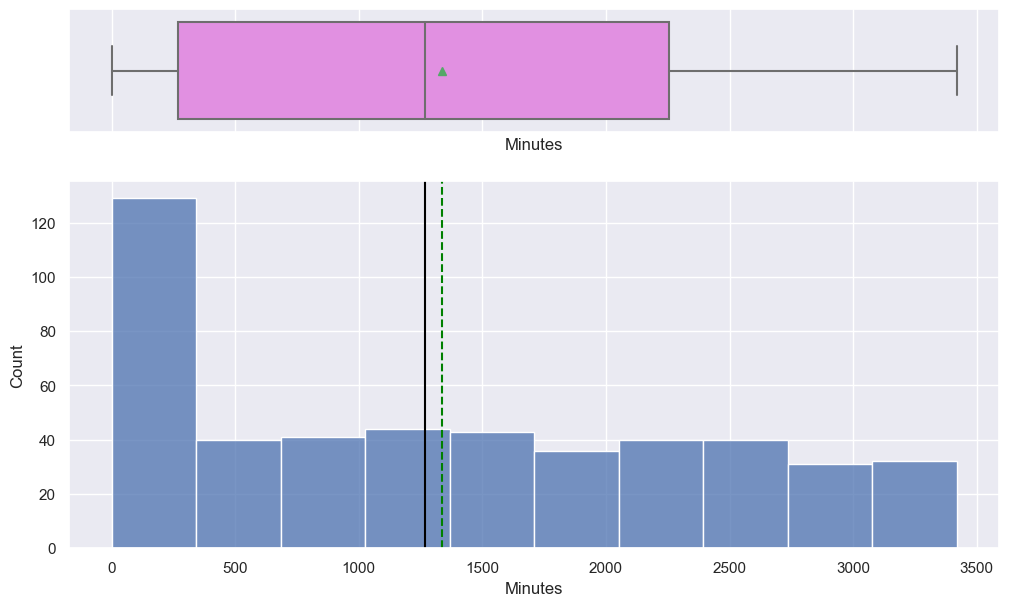

In [15]:
# Plot the histogram and the boxplot for 'Minutes'
histogram_boxplot(df, 'Minutes')

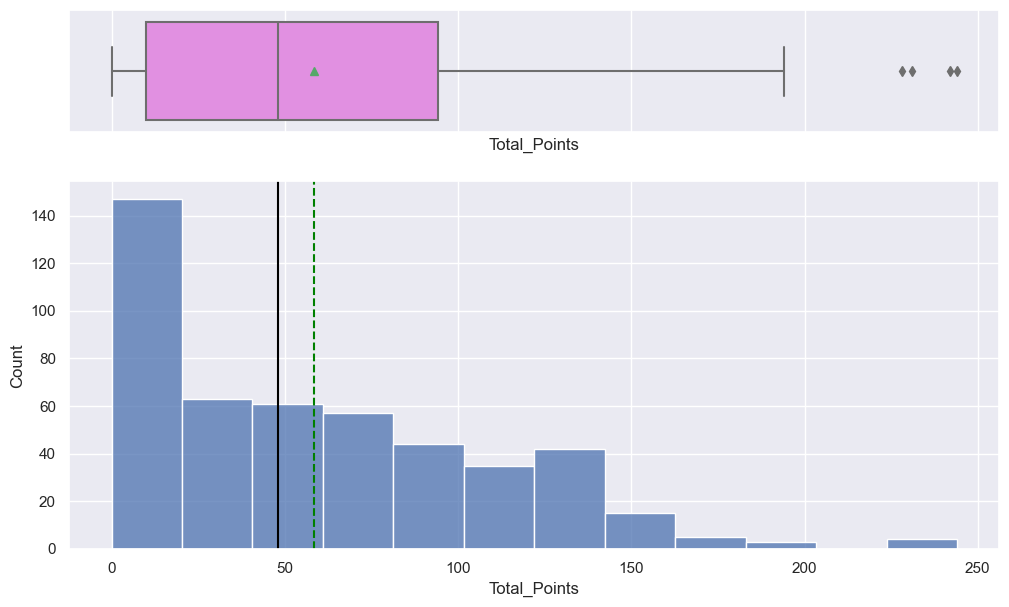

In [16]:
# Plot the histogram and the boxplot for 'Total_Points'
histogram_boxplot(df, 'Total_Points')

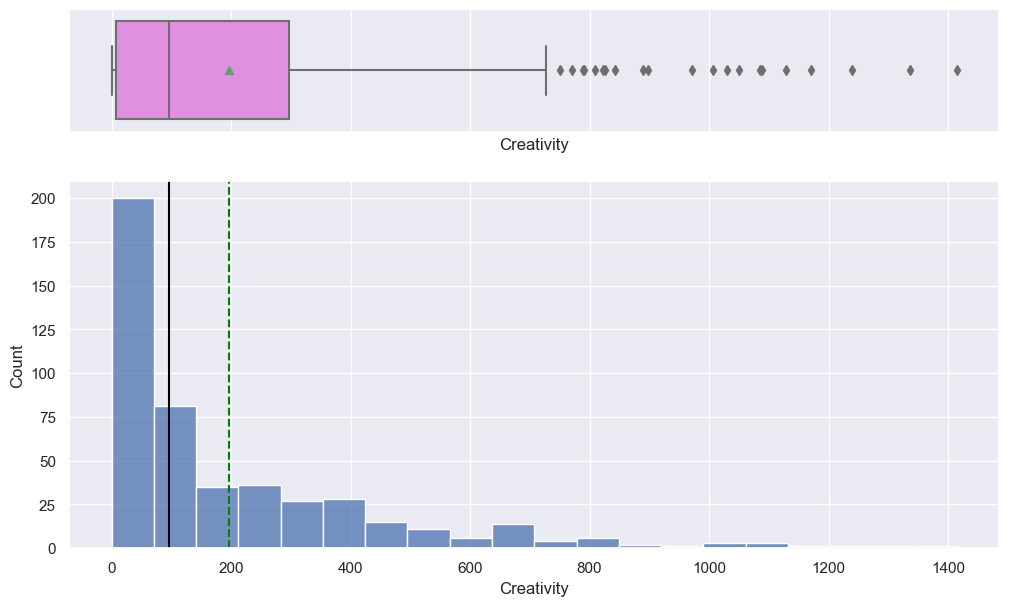

In [17]:
# Plot the histogram and the boxplot for 'Creativity'
histogram_boxplot(df, 'Creativity')

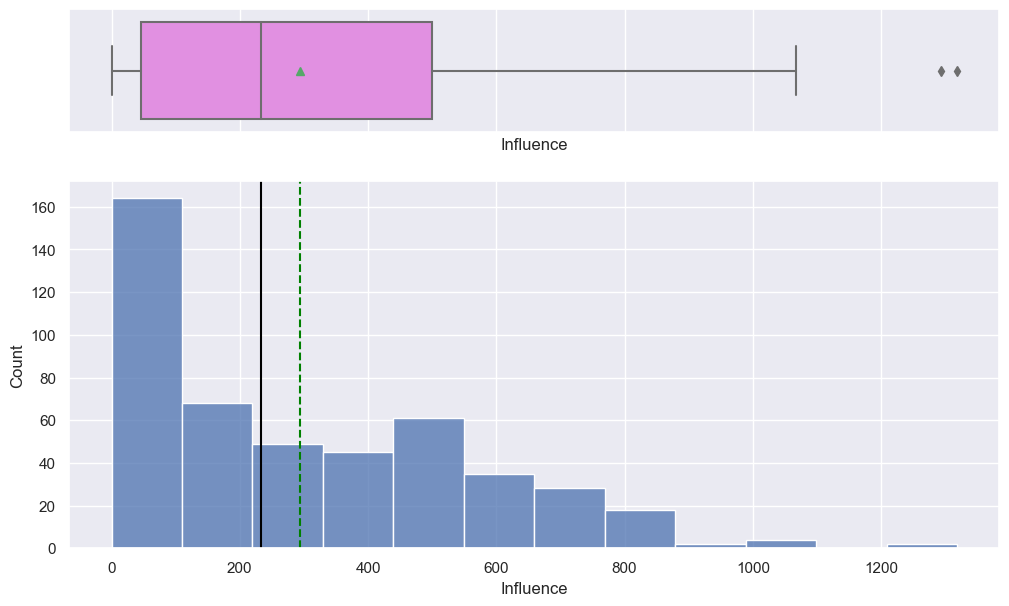

In [18]:
# Plot the histogram and the boxplot for 'Influence'
histogram_boxplot(df, 'Influence')

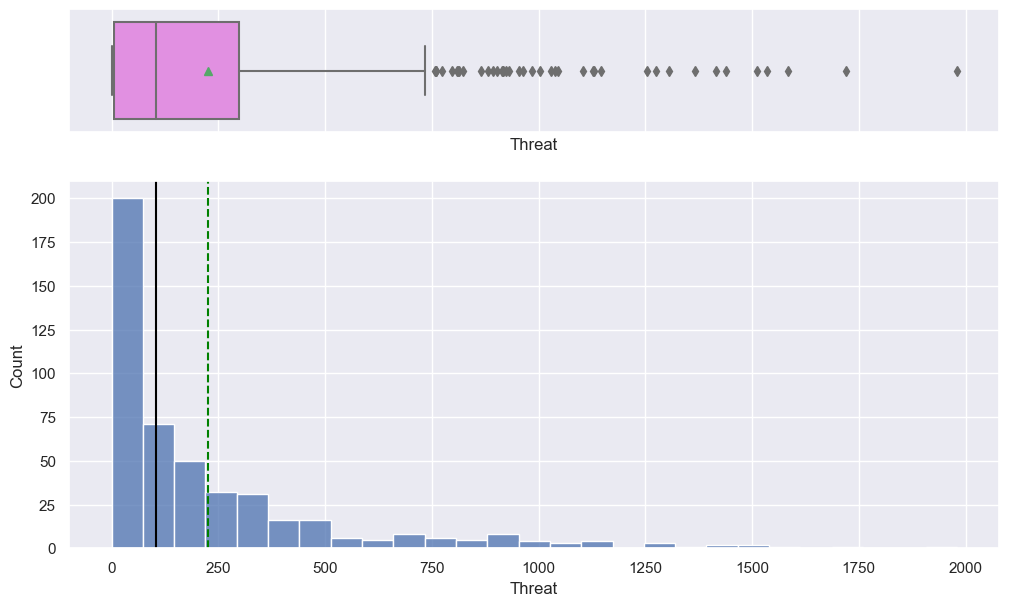

In [19]:
# Plot the histogram and the boxplot for 'Threat'
histogram_boxplot(df, 'Threat')

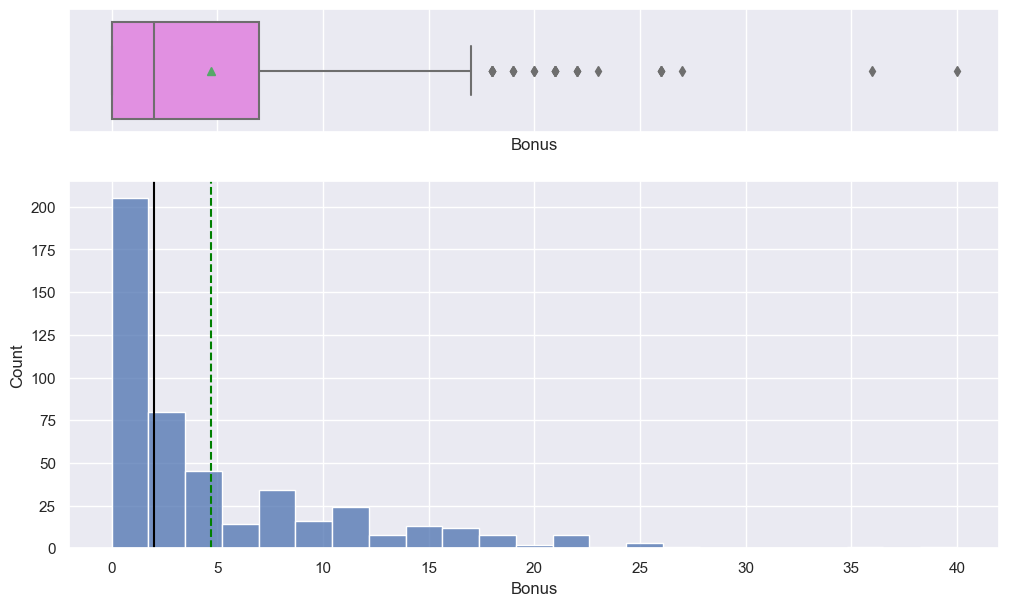

In [20]:
# Plot the histogram and the boxplot for 'Bonus'
histogram_boxplot(df, 'Bonus')

**Observations and Insights for all the plots: _____**
* Los datos para Goals_Scored muestra que esta segada a la derecha es decir que los valores anomalos son grandes y la concentración es en los datos mas pequeños
* Los datos para Assists muestra que esta segada a la derecha es decir que los valores anomalos son grandes y la concentración es en los datos mas pequeños
* Los datos para Goal_Conceded muestra que esta segada un poco a la derecha pero no contiene valores anomalos visibles
* Los datos para Clean_Sheets muestra que esta segada un poco a la derecha pero no contiene valores anomalos visibles
* Los datos para Minutes muestra que esta segada un poco a la derecha pero no contiene valores anomalos visibles
* Los datos para Total_Points muestra que esta segada a la derecha es decir que los valores anomalos son grandes y la concentración es en los datos mas pequeños
* Los datos para Creativity muestra que esta segada a la derecha es decir que los valores anomalos son grandes y la concentración es en los datos mas pequeños
* Los datos para Influence muestra que esta segada a la derecha es decir que los valores anomalos son grandes y la concentración es en los datos mas pequeños
* Los datos para Threat muestra que esta segada a la derecha es decir que los valores anomalos son grandes y la concentración es en los datos mas pequeños
* Los datos para Bonus muestra que esta segada a la derecha es decir que los valores anomalos son grandes y la concentración es en los datos mas pequeños

In [21]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

In [22]:
#data['Club'].value_counts().index[:None].sort_values()

**`Club`**

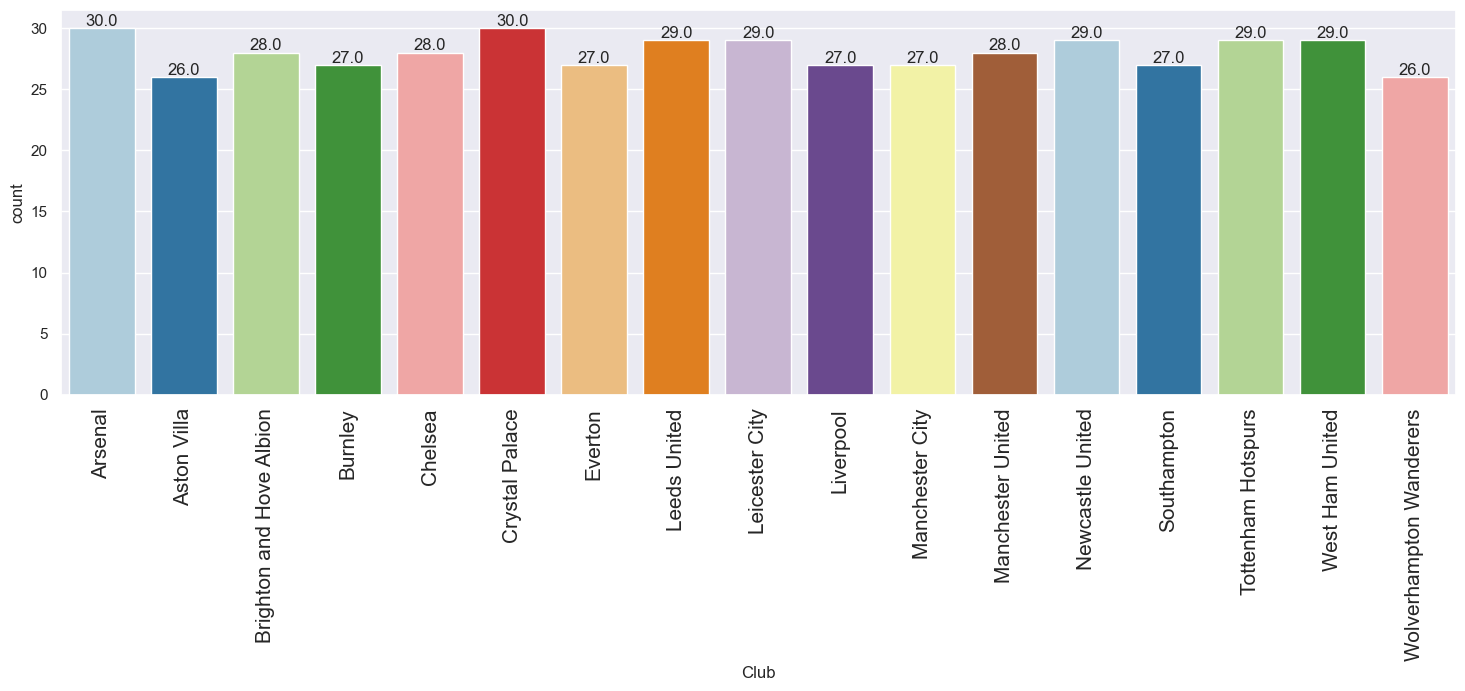

In [23]:
labeled_barplot(df, 'Club')

In [26]:
#count = data['Position'].nunique()
#count

4

**`Position`**

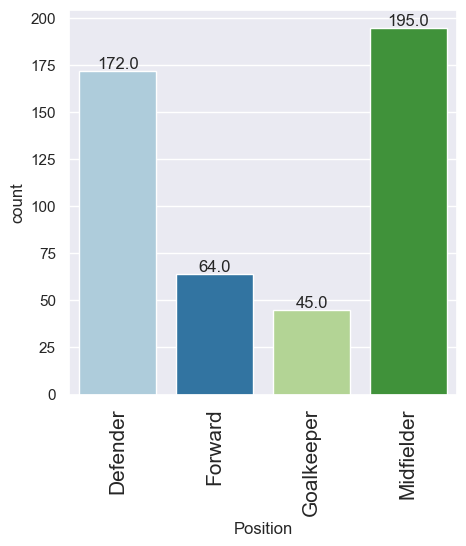

In [24]:
labeled_barplot(df, 'Position')  # Complete the code to create a labelled barplot for 'Position'

**Observations and Insights:__**

* Esta función es muy útil para ver la distribución de los jugadores, en estos casos por equipo y posición
* Los equipos Arsenal y Crystal Palace son los que tienen mas jugadores con 30
* Los equipos Leeds United,Leicester City,Newcastle United, Tottenham Hotspurs y West Ham United tienen 29 jugadores
* Los equipos Brighton and Hove Albion, Chelsea, Manchester United tienen 28 jugadores
* Los equipos Burley,Everton,Liverpool,Southampton tienen 27 jugadores
* Los equipos Aston Villa, Wolverhampton Wanderers tienen 26 jugadores
* Luego en la distribución de posición de juego de los jugadores tenemos, 172 Defender,64 Forward, 45 Goalkeeper y 195 Midfielder 

### **Bivariate Analysis**

**We are done with univariate analysis. Let's explore the data a bit more with bivariate analysis.**

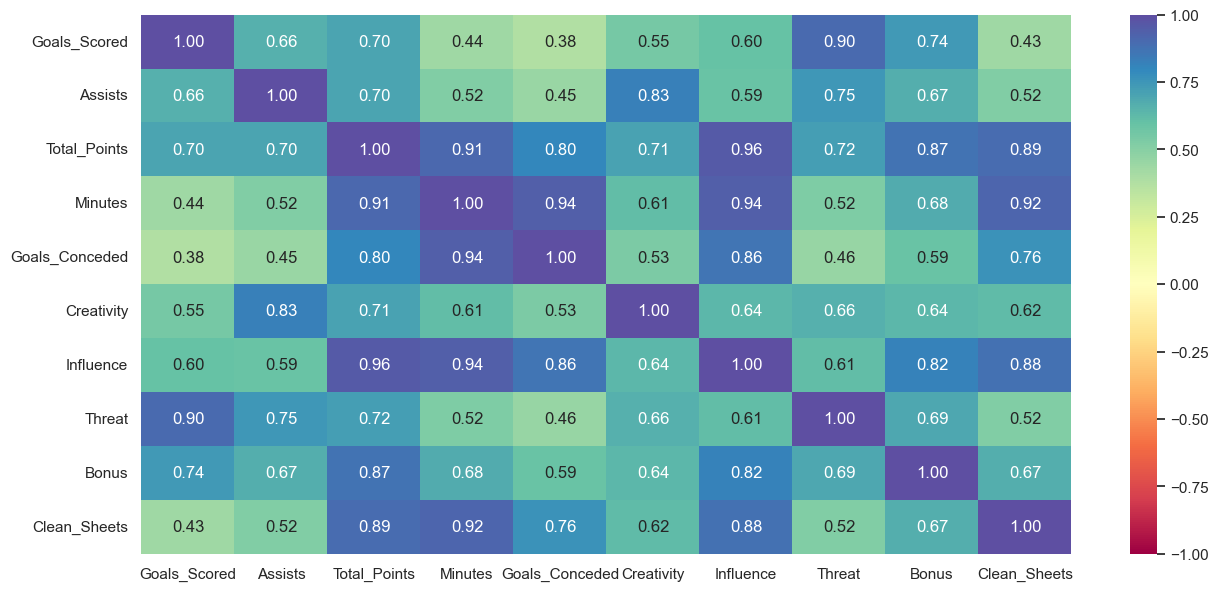

In [27]:
# Correlation check
cols_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    df[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Observations and Insights:__**

**Let's check players from which team have scored the most fantasy points on average.**

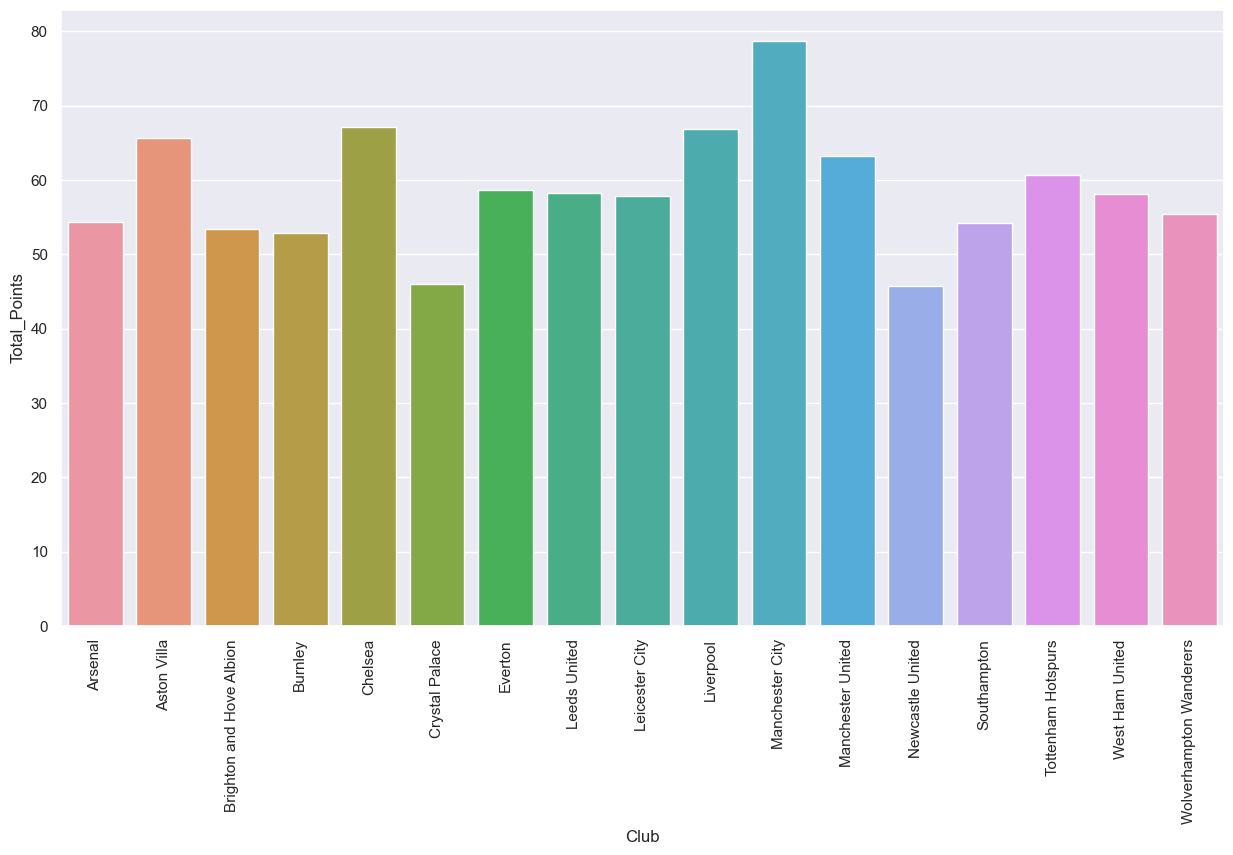

In [40]:
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = df['Club'] , y = df['Total_Points'] , ci = False )  # Complete the code to choose the right variables

plt.xticks(rotation = 90) 

plt.show()

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

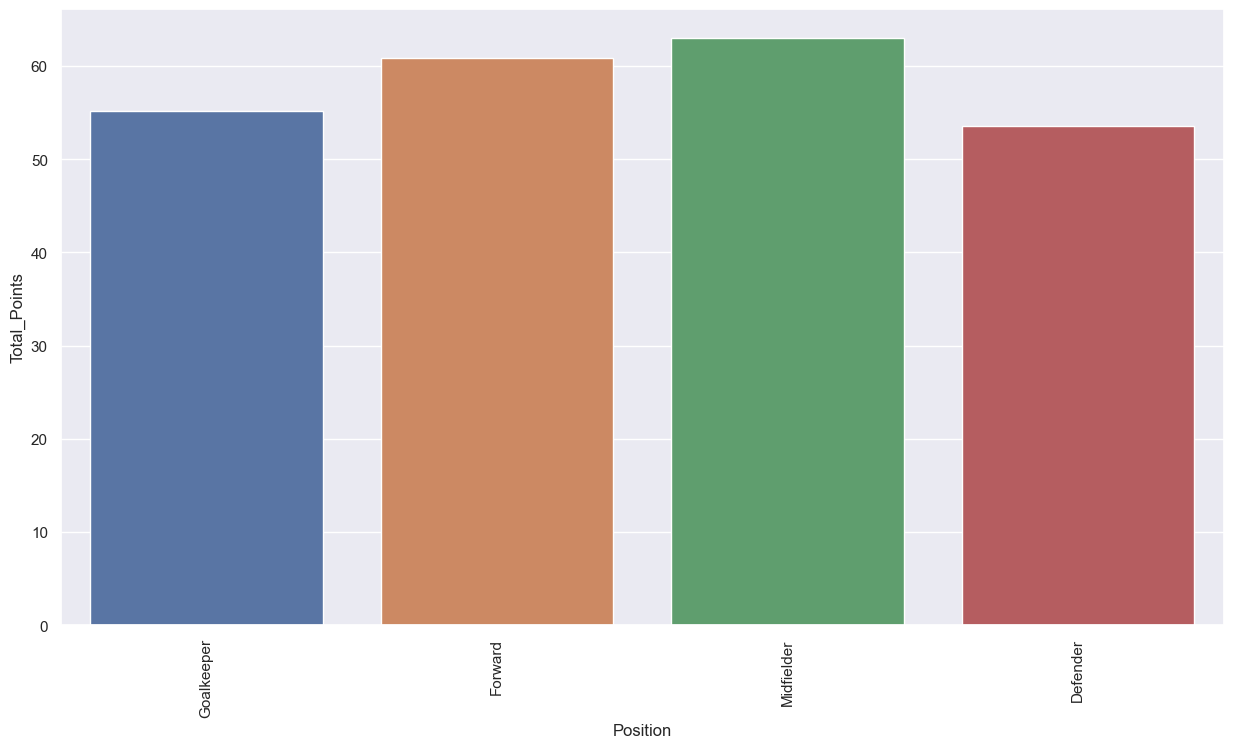

In [41]:
# Complete the code with the right variables
plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = df['Position'] , y = df['Total_Points'] , ci = False )  # Complete the code to choose the right variables

plt.xticks(rotation = 90) 

plt.show()

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

In [ ]:
# Complete the code with the right variables

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

In [ ]:
# Complete the code with the right variables

**Let's see which players scored the most fantasy points last season for different positions of play.**

In [ ]:
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = best_df.append(df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']])

best_df

**Let's see the top 10 players with the most fantasy points last season for different positions of play.**

In [ ]:
best10_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best10_df = best10_df.append(df_aux.sort_values('Total_Points', ascending = False).reset_index(drop = True).loc[:10, ['Player_Name', 'Club', 'Position', 'Total_Points']])

best10_df 

### **Outlier Check**

- Let's plot the boxplots of all numerical columns to check for outliers.

In [ ]:
plt.figure(figsize = (20, 10))

numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(2, 5, i + 1)
    
    plt.boxplot(df[variable], whis = 1.5)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Scaling**

- Let's scale the data before we proceed with clustering.

In [ ]:
# Scaling the data before clustering
scaler = ________ # Initialize the Standard Scaler

subset = ___  # Complete the code to get the data with numerical features

subset_scaled = ______ # Fit_transform the scaler function on data subset

In [ ]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

### **Applying PCA**


In [ ]:
# Defining the number of principal components to generate
n = subset.shape[1]                                    # Storing the number of variables in the subset data

pca = ____________                                     # Initialize PCA with n_components = n and random_state = 1

data_pca = pd.DataFrame(pca.____________)              # Fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                     

## **K-Means Clustering**

In [ ]:
k_means_df = data_pca.copy()

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 1)
    
    model.fit(data_pca)
    
    prediction = model.predict(k_means_df)
    
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")

plt.xlabel("k")

plt.ylabel("Average Distortion")

plt.title("Selecting k with the Elbow Method", fontsize = 20)

plt.show()

**Observations and Insights:**

- We will move ahead with k = 4. **What can be the reason for the same?**

In [ ]:
kmeans = KMeans(______, random_state = 1) # Create K-Means with nclusters = 4

kmeans.fit(k_means_df)

In [ ]:
# Creating a copy of the original data
df1 = df.copy()

# Adding K-Means cluster labels to the K-Means dataframe
k_means_df["KM_segments"] = kmeans.labels_

# Adding K-Means cluster labels to the original dataframe
df1["KM_segments"] = kmeans.labels_

### **Cluster Profiling**

In [ ]:
km_cluster_profile = df1.groupby( ____ ).mean()  # Complete the code to groupby the cluster labels

In [ ]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby( ______ )["Total_Points"].count().values)  # Complete the code to groupby the cluster labels

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0) 

In [ ]:
# Complete the code to print the players in each cluster. Hint: Use the KM_segments feature

for cl in df1[ ___ ].unique(): 
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1[ ____ ] == cl]["Player_Name"].unique())
    print()

In [ ]:
df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

**Let's plot the boxplot**

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1,
                y = df1.columns[3 + counter],
                x = "KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster:___**

## **K-Medoids Clustering**

In [ ]:
kmed_df = data_pca.copy()

In [ ]:
kmed = KMedoids(______, random_state = 1) # Create K-Medoids with nclusters = 4
kmed.fit(kmed_df)

In [ ]:
# Creating a copy of the original data
df2 = df.copy()

# Add K-Medoids cluster labels to K-Medoids data
k_med_df["KMed_segments"] = ________

# Add K-Medoids cluster labels to original data
df2["KMed_segments"] =  _________

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df2' by cluster labels column and then find mean

In [ ]:
# Create the "count_in_each_segment" column in K-Medoids cluster profile

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables

In [ ]:
# Complete the code to print the players in each cluster. Hint: Use the KMed_segments feature

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables

### **Characteristics of each cluster:___**

### **Comparison of cluster profiles from K-Means and K-Medoids:_______________**

##  **Hierarchical Clustering**

In [ ]:
hc_df = data_pca.copy()

In [ ]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

**Let's view the dendrograms for the different linkage methods with Euclidean distance only.**

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)
df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters = ___ , affinity = ___ , linkage = ___ )  # Complete the code to define the hierarchical clustering with average linkage
HCmodel.fit(hc_df)

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = _______________
df3["HC_segments"] = _______________

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df3' by cluster labels column and then find mean

In [ ]:
# Create the "count_in_each_segment" column in hierarchical cluster profile

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables

In [ ]:
# Complete the code to print the players in each cluster. Hint: Use the HC_segments feature

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters = ___ , affinity = ___ , linkage = ___ )  # Complete the code to define the hierarchical clustering with Ward Linkage
HCmodel.fit(hc_df)

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = _______________
df3["HC_segments"] = _______________

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df3' by cluster labels column and then find mean

In [ ]:
# Create the "count_in_each_segment" column in hierarchical cluster profile

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables

In [ ]:
# Complete the code to print the players in each cluster. Hint: Use the HC_segments feature

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables

### **Characteristics of each cluster:___**

### **Comparison of cluster profiles from Hierarchical and previous algorithms:___________________**


## **GMM clustering**

In [ ]:
gmm_df = data_pca.copy()

In [ ]:
gmm = GaussianMixture(________, random_state = 1) # Initializing the Gaussian Mixture algorithm with n_components = 4

gmm.fit(_____) # Fit the Gaussian Mixture algorithm on the gmm_df

### **Cluster Profiling**

In [ ]:
# Creating a copy of the original data
df4 = df.copy()

# Adding gmm cluster labels to the GMM and original dataframes
gmm_df["GMM_segments"] = ____________
df4["GMM_segments"] = _______________

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df4' by cluster labels column and then find mean

In [ ]:
# Create the "count_in_each_segment" column in gmm cluster profile

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables

In [ ]:
# Complete the code to print the players in each cluster. Hint: Use the GMM_segments feature

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables

### **Characteristics of each cluster:___**

### **Comparison of cluster profiles from GMM and previous algorithms:______________________**

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. 
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [ ]:
dbscan_df = data_pca.copy()

In [ ]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [ ]:
# Finding the silhouette_score for each of the combination
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBScan to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                       # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

In [ ]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

In [ ]:
# Applying DBSCAN with the hyperparmeter values that we got

# Fit DBSCAN algorithm with the above hyperparameter values

In [ ]:
# Creating a copy of the original data
df5 = df.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df["db_segments"] = ________________

# Add DBSCAN cluster labels to original data
df5["db_segments"] =  ___________________

### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'df5' by cluster labels column and then find mean

In [ ]:
# Create the "count_in_each_segment" column in hierarchical cluster profile

In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

**Observations and Insights:**

### **Choosing the Best Algorithm**

- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1)        # Initializing K-Means with number of clusters as 4 and random_state = 1

preds = kmeans.fit_predict((data_pca))                   # Fitting and predicting K-Means on data_pca

score = silhouette_score(data_pca, preds)                # Calculating the silhouette score

print(score)         

In [ ]:
# Initialize K-Medoids with number of clusters as 4 and random_state = 1

# Fitting and predicting K-Medoids on data_pca

# Calculate the silhouette score

# Print the score 

In [ ]:
# Initialize Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4

# Fitting and predicting HC algorithm on data_pca  

# Calculate the silhouette score

# Print the score 

In [ ]:
# Initialize Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1

# Fitting and predicting Gaussian Mixture algorithm on data_pca

# Calculate the silhouette score

# Print the score 

**Think about it:**

- Which is the best algorithm here among all the algorithms?

## **Conclusion:**__


## **Recommendations:**__